# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

Our group decided to look into gun mortality rates within New York City in order to assess the current interaction between rising costs of living within the area resulting in an increase in overall gun ownership and whether or not these factors have lead to an increase in overall gun violence. This was done to determine whether or not more stringent methods of gun control might be suitable for the current state of the city.

Our data showed that more gun-related crime was committed in higher income areas than lower, as well as done by the age group of 18-26, leading us to question whether overall maturity may not be high enough for gun ownership and that that may be one avenue to pursue. Further analysis also showed that gun violence in New York has increased a substantial amount in the years of 2012-2016 in comparison to 2003-2011.

# Names

- Adri
- Angel
- Nathan
- Yuan Chen

<a id='research_question'></a>
# Research Question

What is the leading mortality rate in New York City? Is it related to guns and suicide? Is stricter gun control necessary?

<a id='background'></a>

## Background & Prior Work

New York City is one of the most famous cities in the world, known largely as a cultural melting pot that embraces American ideals. Thus, it is difficult to find a more appropriate location in the world for a study that lacks issues such as racial or economical bias, as people of all kinds and means live there. 

According to the article *Does New York City Need Gun Control?*, NYC constitutes a wealthy city. However, as wealth within the city has increased, so too has gun ownership. One of the questions we seek to answer is whether or not this increased amount of guns within the city has led to a similarly increased rate of mortality due to gun-related issues. Despite the increased rates of gun purchases, the article *The Wave of Gun Violence in N.Y.C.* states that the city has embraced the title of the safest big city in the country, having one of the five lowest mortality rates in the country. But due to a recent emergence from a months-long lockdown due to COVID-19, it is battling a surge in gun violence. 

It's no secret that the battle over whether more gun control is necessary in the United States has been waged for a long time, with extreme emotions and volatility on both sides. Thus, using New York City as our backdrop, and the data provided by official government sources, we will analyze the death rate within the city and how many of these deaths are directly caused by gun-related violence to provide statistical evidence of the impact of increasing rates of gun ownership in the city.


References (include links):
- 1) Does New York City Need Gun Control?

  Link: https://www.nytimes.com/2020/07/15/nyregion/nyc-shootings.html
  
  
- 2)The Wave of Gun Violence in N.Y.C.

  Link: https://www.npr.org/2019/12/19/788440932/does-new-york-city-need-gun-control

# Hypothesis


Through economic development, the quality of life of the citizens of New York City has also improved. The reduction in death rates in New York City reflects a better social climate. What is uncertain is whether this economy has reduced deaths caused by gun violence. Analysis on the number of shootings in New York City at different time periods and the proportion of deaths caused by them will be performed to answer if a higher proportion of gun owners results in a similarly higher proportion of deaths due to gun violence.

# Dataset(s)

Dataset 1:
- Dataset name: NYPD Shooting Incident Data
- Link : https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8
- Observation : 21627
- Description : this dataset includes dates, race, gender, location

Dataset 2:
- Name: Vital Statistics Suicide Deaths
- Link : https://data.world/healthdatany/j6fz-a4ta
- Observation : 2077
- Description: his dataset includes years, race, gender, number of  firearm, alcohol and suicide death

Dataset 3:
- Name: New York City Leading Causes of Death
- Link : https://data.world/city-of-ny/jb7j-dtam
- Observation : 1517
- Description: this dataset includes year, cause of death, number of death per cause,  and race

# Setup

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read 3 dataset 
dataset_1 = pd.read_csv('NYPD_Shooting_Incident_Data__Historic.csv')
dataset_2 = pd.read_csv('https://query.data.world/s/3ehvob5gu7u3m7qd6s2zu4md66hngi')
dataset_3 = pd.read_csv('https://query.data.world/s/5hd4cmmsv5mtw63rkfm234utzu3xrt')

# setup the row/columns that display on the dataframes, avoid show too many rows/columns
pd.options.display.max_rows = 9
pd.options.display.max_columns = 9

# Data Cleaning

__Steps__: 

1. remove all the columns that are not relevant to the question( or only take the columns that we need to answer the question)
2. remove all rows that have missing data
3. change the column names for better understanding if needed

In [2]:
# define a function that clean the missing data
def remove_missingdata(dataset):
    number_of_missdata = dataset.isnull().sum(axis=1).tolist()
    new_list = []
    for index in range(len(number_of_missdata)):
        if number_of_missdata[index] != 0:
            new_list.append(index)
    dataset = dataset.drop(dataset.index[new_list])
    return dataset
## dataset 1 cleaning
# take the columns we needed
dataset_1 = dataset_1[['OCCUR_DATE','BORO','PERP_AGE_GROUP','PERP_RACE','VIC_RACE']]
# clean the rows that have missing data
dataset_1 = dataset_1.replace('UNKNOWN',np.nan)
dataset_1 = remove_missingdata(dataset_1)
dataset_1
# rename the columns
dataset_1.columns = (['Date','Area', 'Shooter_age','Shooter_race','Victim_race'])
dataset_1 = dataset_1.reset_index(drop = True)
dataset_1.head()

,Date,Area,Shooter_age,Shooter_race,Victim_race
0,11/27/2019,BRONX,<18,BLACK,BLACK
1,02/02/2019,MANHATTAN,18-24,WHITE HISPANIC,BLACK HISPANIC
2,10/24/2019,STATEN ISLAND,25-44,BLACK,BLACK
3,08/22/2019,BRONX,25-44,BLACK HISPANIC,BLACK
4,06/07/2019,BROOKLYN,45-64,WHITE HISPANIC,BLACK


In [3]:
## dataset 2 cleaning
# take the columns we needed
dataset_2 = dataset_2[['Year','Region','Race or Ethnicity','Sex','Age Group','Firearm Deaths','Alcohol-Related Deaths']]

# clean the rows that have missing data
dataset_2 = dataset_2.replace(0,np.nan)
dataset_2 = remove_missingdata(dataset_2)
# need more cleaning for wrong data format
dataset_2 = dataset_2.replace('Total',np.nan)
dataset_2 = dataset_2.replace('19-Oct',np.nan)
dataset_2 = dataset_2.replace('9-Jan',np.nan)
dataset_2 = dataset_2.replace('<1',np.nan)
dataset_2 = remove_missingdata(dataset_2)
# rename the columns
dataset_2.columns = (['Year','Region','Race','Sex','Age','Gun-Related Deaths','Alcohol-Related Deaths'])
dataset_2 = dataset_2.reset_index(drop = True)
dataset_2.head()

,Year,Region,Race,Sex,Age,Gun-Related Deaths,Alcohol-Related Deaths
0,2017,ROS,White Non Hispanic,M,85+,21.0,57.0
1,2017,ROS,White Non Hispanic,F,85+,1.0,59.0
2,2017,ROS,White Non Hispanic,M,75-84,40.0,195.0
3,2017,ROS,White Non Hispanic,F,75-84,2.0,107.0
4,2017,ROS,White Non Hispanic,M,65-74,45.0,410.0


In [4]:
## dataset 3 cleaning
# take the columns we needed
dataset_3 = dataset_3[['Year','Leading Cause','Sex','Race Ethnicity','Deaths']]

# clean the rows that have missing data
dataset_3= dataset_3.replace('Not Stated/Unknown',np.nan)
dataset_3= dataset_3.replace('.',np.nan)
dataset_3 = remove_missingdata(dataset_3)
def clean_brackets(data):
    value = 0
    if '(' in data and data.index('(') != 0:
        value = data.index('(')
        return data[:value]
    else:
        return data
dataset_3['Leading Cause'] = dataset_3['Leading Cause'].apply(clean_brackets)
# rename the columns

dataset_3.columns = (['Year','Leading_Cause','Sex','Race','Deaths'])
dataset_3 = dataset_3.reset_index(drop = True)
dataset_3.head()


,Year,Leading_Cause,Sex,Race,Deaths
0,2010,Assault,M,Black Non-Hispanic,299
1,2011,Diseases of Heart,M,Black Non-Hispanic,1840
2,2014,Accidents Except Drug Posioning,F,Hispanic,64
3,2012,Accidents Except Drug Posioning,M,Black Non-Hispanic,152
4,2009,All Other Causes,M,Asian and Pacific Islander,220


# Data Analysis & Results

__Dataset_1 EDA__(  Analysis done by Yuan Chen )

First, we concered the most dangerous  area in NYC by determine the area that  has the most gun viloence cases. we take the dataset_1 which contains the cases that recored by police office which all cases of firearm that happened from 2006 to 2019.

Text(0.5, 1.0, '# of firearm cases located at diff Area in NYC')

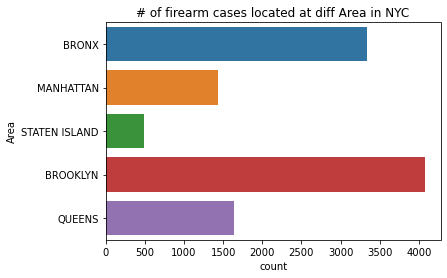

In [5]:
sns.countplot(y ='Area', data = dataset_1).set_title('# of firearm cases located at diff Area in NYC')

   Through the value of the bar graph, we can observe that the number of gun incidents in BROOKLYN and BRONX is very high, and we can associate the prosperity of the area. For example, BROOKLYN is a very famous city. In recent years, the economy has developed very rapidly and many foreign residents have arrived. Usually, there is a chance that there will be some disputes between foreign residents and local residents, and the large logarithm is because of differences in culture or ethnicity.
Next, let us analyze whether there are differences in race or nationality between the assailant and the victim in the shooting.

Text(0.5, 1.0, 'Victim races')

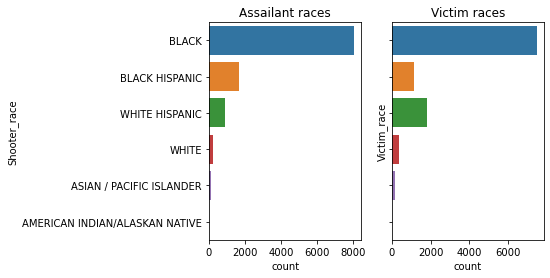

In [6]:
fig,(ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(y = 'Shooter_race', data = dataset_1, ax =ax1).set_title("Assailant races")
sns.countplot(y = 'Victim_race', data = dataset_1, ax =ax2).set_title("Victim races")

Through the two bar graphs, it can be observed that the ratio of murderers and victims in each race is very close. We cannot judge from this whether these are related to racial exclusion. So we look for more information by interpreting the age of each perpetrator.
In the law, you can legally own a gun at the age of 18. 

__Analyze the age of the murderer.__
We need to further organize the data, because the age in the data is only a range value, and there are many wrong data. In order to make the data more accurate, we decided to use a small age value in the numerical range to judge and analyze:

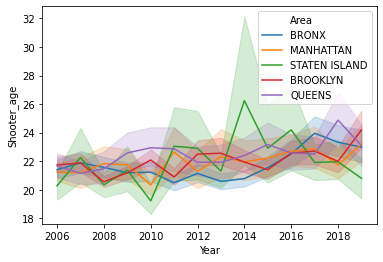

In [7]:
dataset_1['Year'] = pd.to_datetime(dataset_1.Date).dt.strftime('%Y').astype(int)
dataset_1.dtypes
def standardize_age(string):
    string = string.lower()
    string = string.strip()
    string = string.replace('<','')
    string = string.replace('>','')
    string = string.replace('+','')
    string = string.replace('-','')
    string = string.replace('940','')
    string = string.replace('224','')
    string = string.replace('1020','')
    string = string.strip()
    if string.isnumeric():
        return int(string[0:2])
    else:
        return np.nan
dataset_1['Shooter_age'] = dataset_1['Shooter_age'].apply(standardize_age)
sns.lineplot(x = 'Year', y = 'Shooter_age',data = dataset_1, hue = 'Area')

From the multiple line graphs, we can see that the age of the murderers in each area of New York City is mostly between 20 and 26. We call this age group young adults. Adults at this age are not very mature and stable, and may be more radical when making decisions. This is also a possible reason why most criminals in shootings are in their 20s. This makes us wonder whether raising the age of legal possession of firearms can effectively reduce the incidence of shootings. For example, there are fewer cases over 25 years old in the graph, and this number can be used for reference.

__Dataset_2 EDA__: ( Analysis done by Nathan )

The second data mainly records the number of deaths related to firearms and alcoholism in the deaths that occur each year. Through analysis, did the deaths caused by guns increase between 2003 and 2017?

In [8]:
#Cleaning the data to only include NYC region
ds2_nyc = dataset_2[dataset_2['Region'] == 'NYC']
ds2_nyc_gb = ds2_nyc.groupby("Year").sum()
ds2_nyc_gb = ds2_nyc_gb.reset_index()
ds2_nyc_gb.head()

,Year,Gun-Related Deaths,Alcohol-Related Deaths
0,2003,44.0,840.0
1,2004,30.0,1136.0
2,2005,40.0,1206.0
3,2006,254.0,1422.0
4,2007,350.0,1507.0


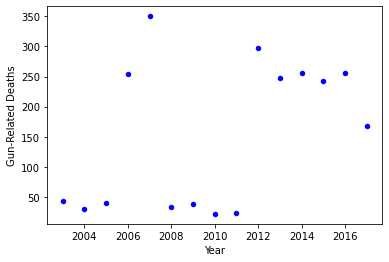

In [9]:
ax1 = ds2_nyc_gb.plot.scatter(x = 'Year', y = 'Gun-Related Deaths', c = 'blue')

The data provides an overall increasing trend in gun-related deaths since 2012, but a lack of data for 2017 to the present does open questions about the validity of the trend shown here. Still, such a significant increase merits further investigation into causes and concerns over increased gun violence.

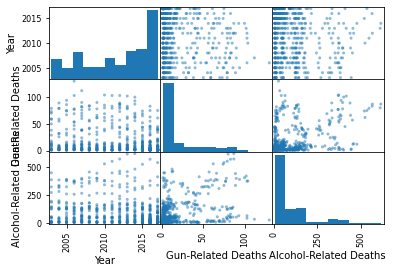

In [15]:
fig = pd.plotting.scatter_matrix(dataset_2)

A scatter matrix to showcase all the numeric data with itself to see if any obvious trends jump out at a glance before cleaning. Unfortunately, the only useful comparisons here are gun-related deaths per year, and alcohol-related deaths per year. They remain fairly consistent throughout the data.

__Dataset_3 EDA__ ( Analysis done by Adri )

In [11]:
list_casue = dataset_3['Leading_Cause'].unique().tolist()
list_casue

['Assault ',
 'Diseases of Heart ',
 'Accidents Except Drug Posioning ',
 'All Other Causes',
 'Essential Hypertension and Renal Diseases ',
 'Diabetes Mellitus ',
 'Cerebrovascular Disease ',
 'Chronic Lower Respiratory Diseases ',
 'Certain Conditions originating in the Perinatal Period ',
 'Human Immunodeficiency Virus Disease ',
 'Malignant Neoplasms ',
 'Intentional Self-Harm ',
 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use ',
 'Septicemia ',
 'Influenza ',
 'Chronic Liver Disease and Cirrhosis ',
 "Alzheimer's Disease ",
 'Nephritis, Nephrotic Syndrome and Nephrisis ',
 'Viral Hepatitis ',
 'Congenital Malformations, Deformations, and Chromosomal Abnormalities ']

By listing all the causes of death, of which only Assault is likely to be related to the shooting, let us analyze the annual changes in the number of deaths caused by Assault.

In [12]:
dataset_3 = dataset_3.astype({'Year':'int64','Leading_Cause':'object','Sex':'object','Race':'object','Deaths':'int64'})

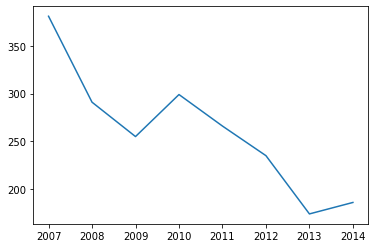

In [13]:
new_data = dataset_3[dataset_3['Leading_Cause'] == 'Assault ']
new_data = new_data.groupby('Year')[['Deaths']].sum()
new_data
list_year = [2007,2008,2009,2010,2011,2012,2013,2014]
list_deaths = new_data['Deaths'].tolist()
sns.lineplot(x = list_year,y = list_deaths)

The graph shows that the number of assaults is gradually decreasing every year, but we can draw a guess from the second data that during the period 2012-2014, the number of gun-related deaths increased slightly. This may mean that assaults in New York City have been reduced, but it has not reduced the incidence of shootings.

# Ethics & Privacy

All the data comes from public databases of the government or public agencies, such as the New York police department and the New York government website, so the data are very reliable and credible. There is no personal information such as SNS, name, or addresses in the data, which can guarantee that it cannot harm or violate the privacy of others.

Our analysis is just to find out whether gun deaths have been reduced as the death rate in New York City declines, and whether it is necessary to control the use of guns. This does not lead to prejudice, because our analysis will only yield a recommendation, and there is no prejudice against a certain group.

# Conclusion & Discussion

Due to crime records and mortality causes being publically accessible, data for the state of New York was readily available and well catalogued for our perusal. Our group wanted to use this data to ascertain whether or not stricter gun control methods might be suitable for the current environment, due to increases in gun violence within wealthier communities in the districts of New York City.

Our data showcases a potential correlation between more prosperous communities and increases in crimes involving guns (Figure 1), as well as an increase in gun-related mortalities in recent years (Figure 4). Alongside this, questions were raised as to whether or not the legal age to own a firearm should be increased, as most gun-related crimes were committed by individuals in the youngest age bracket of 18-26 (Figure 3). Of course, this data is somewhat limited in the years available and thus an overall trend is difficult to nail down and conclusively utilize, but is still relevant to the discussion at hand and paints the picture with enough detail to encourage further research and analysis.

Most of the time, people believe that low-income areas and gun violence tend to walk hand in hand, whereas this data shows that wealthier areas are just as if not more susceptible to these types of crime. Gun safety measures have been a hot topic for quite a few years now, yet much of the rhetoric thrown around, both in support of more stringent gun control and against it, tends to lack a basis in fact and instead is very emotional. More research into the root causes of this type of gun violence as well as the accessibility of firearms is a vital step to ensure that regulations are made to keep all communities safer and to reduce gun crime, and this is the type of first step necessary to highlight areas of focus for future analysis.

# Team Contributions

- Adri
    - Data Analysis, and ethic & Privacy
- Angel
    - Hosted and scheduled all Zoom Meetings, and data cleaning
- Nathan
    - Data Analysis, overview, and conclusion
- Yuan Chen
    - Data Analysis, topic research, background and collect the datasets